# Gender Prediction Model

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model  

# Load data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/heights_weights.csv"
df = pd.read_csv(file_name)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [2]:
df.shape

(10000, 3)

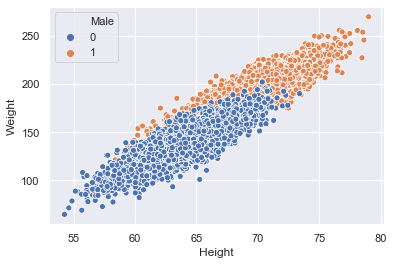

In [3]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Height", y="Weight", hue="Male", data=df)

In [4]:
# Extract the columns we'll use for our data

x = df.iloc[:,0:2].values 
y = df.iloc[:,2].values

In [5]:
# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [6]:
# Fit (train) the Logistic Regression classifier
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X_train, Y_train)

In [7]:
# Predict based on height (inches) and weight (lbs)
height = 61
weight = 125

# Get prediction
prediction = clf.predict([(height,weight)])

if prediction[0]:
  result = "Male"
else:
  result = "Female" 

print("Person is " + result)

Person is Female


In [8]:
# We have 3 values of theta

# For theta_0:
print( fitted_model.intercept_ )

# For theta_1 and theta_2:
print( fitted_model.coef_ )

[-0.03019374]
[[-0.49519206  0.20348748]]


[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

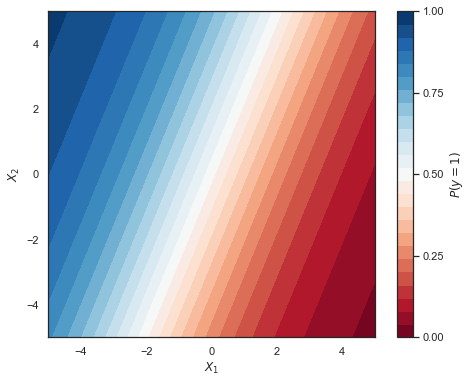

In [9]:
# Creating our Logistic Regression Plot
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train[100:,0], X_train[100:, 1], c=Y_train[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

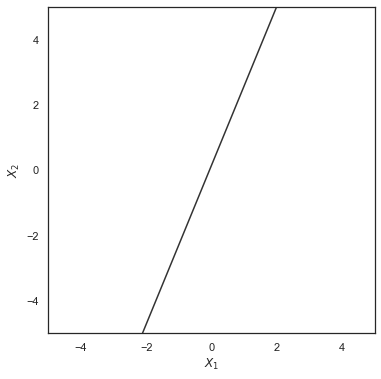

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X_train[100:,0], X_train[100:, 1], c=Y_train[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [12]:
# saving our model
from joblib import dump, load


dump(clf, 'gender_model.joblib') 

['gender_model.joblib']

In [14]:
clf = load('gender_model.joblib') 


prediction = clf.predict([(67, 127)])

if prediction[0]:
    result = "Male"
else:
    reult = "Female"
    
    
print(f'The )